Lucas van Wijk: 1719949

https://github.com/LucasVanWijk/HPP_Herkansing


# Resultaat

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('results/circuit/circuit_results.csv')
# remove spaces in column names
df.columns = df.columns.str.replace(' ', '')
df

,cores,Solutions,time
0,1,81,281.0000
1,1,81,289.0000
2,2,81,145.0000
3,3,81,96.5318
4,4,81,72.0000
5,5,81,58.3650
6,6,81,50.1703


Text(0, 0.5, 'Time (s)')

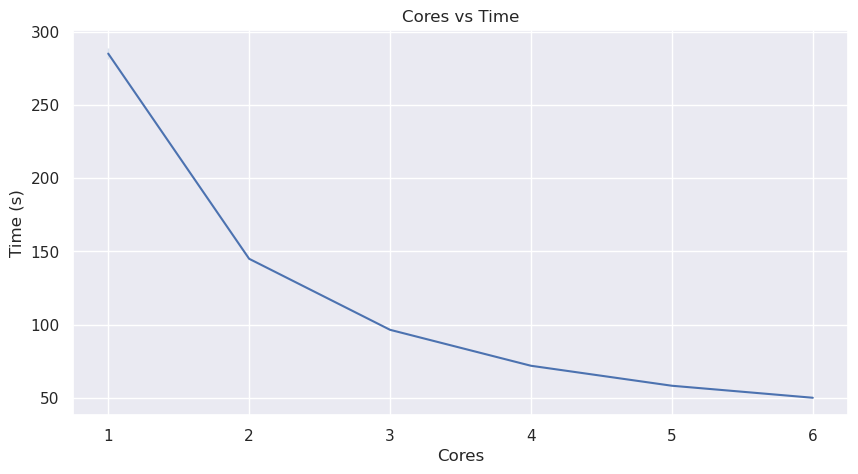

In [10]:
# plot cores vs time
sns.set()
plt.figure(figsize=(10, 5))
sns.lineplot(x='cores', y='time', data=df)
plt.title('Cores vs Time')
plt.xlabel('Cores')
plt.ylabel('Time (s)')


# Analyse

In de resultaten is een redelijk lineare relatie te zien tussen de toenamen van cores en afnamen van compuut duur

Text(0, 0.5, 'speed_per_core')

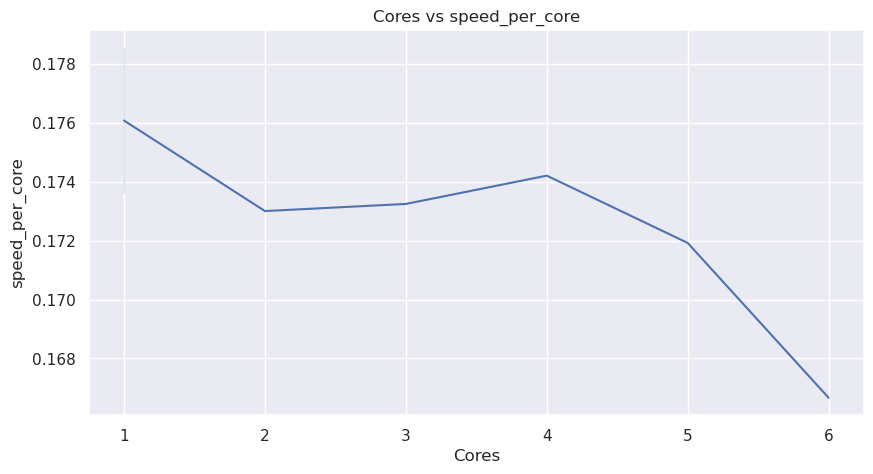

In [12]:
#calcualte the speedup per core
df['speedup'] = df['time'].min() / df['time']
df['delta_core'] = df['cores'] -df['cores'].min()
df["speed_per_core"] = df['speedup'] / df['cores']

# plot cores vs speedup
plt.figure(figsize=(10, 5))
sns.lineplot(x='cores', y='speed_per_core', data=df)
plt.title('Cores vs speed_per_core')
plt.xlabel('Cores')
plt.ylabel('speed_per_core')


Hier is een lichte afnamen te zien in de perfomce boost hoe meer cores er zijn. Dit is logisch omdat niet elke stap in het algoritme parreliseerbaar is. Toch is deze afnamen minimaal. 

# Code

In [ ]:
int main (int argc, char *argv[])
{
   unsigned int i;// loop variable (32 bits)
   const long REPS = UINT_MAX;
   int id = -1, numProcesses = -1;                 // process id
   int global_count = 0, local_count = 0;
   double startTime = 0.0, totalTime = 0.0;
   int start, stop;   


   bool *v = (bool *)malloc(sizeof(bool) * SIZE); /* Each element is one of the 32 bits */

   MPI_Init(&argc, &argv);
   MPI_Comm_rank(MPI_COMM_WORLD, &id);
	MPI_Comm_size(MPI_COMM_WORLD, &numProcesses);
   startTime = MPI_Wtime();
   //combination = 0; combination < UINT_MAX; combination++
   // find chunk size for part of processes
   int chunck = (int)ceil(((double)REPS) / numProcesses);
   int remain = REPS % numProcesses;

   // When remainder is 0, we have equal-sized chunks for all processes.
   if (remain == 0 || (remain != 0 && id < remain)) {
     start = id * chunck;
     stop = start + chunck;
   } 
   else {
     int chunck2 = chunck - 1;
     start = (remain * chunck) + (chunck2 * (id - remain));
     stop = start + chunck2;
   }

   for (int combination = start; combination < stop; combination++) {  
      for (i = 0; i < SIZE; i++)
         v[i] = EXTRACT_BIT(combination, i);

      local_count += checkCircuit(id, v);   // iterate through our range
   }
   totalTime = MPI_Wtime() - startTime;
   cout << "Process " << id << " took " << totalTime << " seconds." << endl << "and found " << local_count << " solutions." << endl;
   MPI_Barrier(MPI_COMM_WORLD);
   MPI_Reduce(&local_count, &global_count, 1, MPI_INT, MPI_SUM, 0, MPI_COMM_WORLD);
   MPI_Finalize();
   if (id == 0) {
      totalTime = MPI_Wtime() - startTime;
      cout << "A total of " << global_count << " solutions were found." << "taking" << totalTime << "seconds" << endl;
   }

   return 0;
}